In [148]:
import numpy as np
import matplotlib.pyplot as plt



t_i = 0 # intial time
t_f = 1000#final time
nsteps = 10**4# number of steps between intial and final times
time = np.linspace(0,t_f, nsteps)
#xd = time/1e3

h = (t_f-t_i)/nsteps # increments

# Defining Parameters
T = 1000  # time of evolution
dt = 0.1 # time step discretization
w = 100  # cm^-1 delta omega
N = 2   
J = 100 # cm^-1 constant of interaction
gamma = 53.08  # cm^-1 gamma from spectral density from Kimara's paper
lam = J/5# cm^-1 lambda from spectral density
kT = 208.509  # cm^-1 T=300K 1/beta
L = 4  # number of terms in exponential expansion
fs = 0.0001836  # factor for transition times into femtoseconds
#h_bar=1.054571817*(10**(-34))*fs

# Set Matrices for HEOM
id4 = fs * np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
elev = fs * complex(0, 1) * np.array([[0, J, -J, 0], [J, -w, 0, -J], [-J, 0, w, J], [0, -J, J, 0]])
Phi1 = fs  * np.array([[0, 0, 0, 0], [0, 1j, 0, 0], [0, 0, -1j, 0], [0, 0, 0, 0]])
Phi2 = fs  * np.array([[0, 0, 0, 0], [0, -1j, 0, 0], [0, 0, 1j, 0], [0, 0, 0, 0]])
x = 2 *lam*kT
y = lam*gamma
Theta1 = fs * np.array([[2*y, 0, 0, 0], [0, complex(y, x), 0, 0], [0, 0, complex(y, -x), 0], [0, 0, 0, 0]])
Theta2 = fs * np.array([[0, 0, 0, 0], [0, complex(y, -x), 0, 0], [0, 0, complex(y, x), 0], [0, 0, 0, 2*y]])

Nmax = 6  # number of density matrices for N=2


In [149]:
print(id4)

[[0.0001836 0.        0.        0.       ]
 [0.        0.0001836 0.        0.       ]
 [0.        0.        0.0001836 0.       ]
 [0.        0.        0.        0.0001836]]


In [150]:
z = complex(3, 4)
print(z)


(3+4j)


In [151]:
def Heom():
    current_state=np.zeros((Nmax,4,1), dtype=complex)
    prev=np.zeros((Nmax,4,1), dtype=complex)
    
    current_state[0,0]=1.0 # inital value for p
    prev[0]=current_state[0]

    p_matrix=np.zeros((nsteps,4,1),dtype=complex) # matrix that stores the matrices for d/dt(p)(results)
    p_matrix[0]=current_state[0]
    
    for index in range(1, len(time)):
        current_state[0] = prev[0] + h*(np.dot(elev, prev[0]) + np.dot(Phi1, prev[1]) + np.dot(Phi2, prev[2]))
        p_matrix[index]=current_state[0] 
        current_state[1] = prev[1] + h*(np.dot(elev - gamma * id4, prev[1]) + np.dot(Phi2, prev[5]) + np.dot(Phi1, prev[3]) + np.dot(Theta1, prev[0]))
        current_state[2] = prev[2] + h*(np.dot(elev - gamma * id4, prev[2]) + np.dot(Phi1, prev[5]) + np.dot(Phi2, prev[4]) + np.dot(Theta2, prev[0]))
        current_state[3] = prev[3] + h*(np.dot(elev, prev[3]))
        current_state[4] = prev[4] + h*(np.dot(elev, prev[4]))
        current_state[5] = prev[5] + h*(np.dot(elev, prev[5]))
        prev=current_state
        
    return p_matrix
        

In [155]:
sol=Heom()
print(sol)

[[[ 1.00000000e+00+0.00000000e+00j]
  [ 0.00000000e+00+0.00000000e+00j]
  [ 0.00000000e+00+0.00000000e+00j]
  [ 0.00000000e+00+0.00000000e+00j]]

 [[ 1.00000000e+00+0.00000000e+00j]
  [ 0.00000000e+00+1.83600000e-03j]
  [ 0.00000000e+00-1.83600000e-03j]
  [ 0.00000000e+00+0.00000000e+00j]]

 [[ 9.99993258e-01+0.00000000e+00j]
  [ 3.37089600e-06+3.67200000e-03j]
  [ 3.37089600e-06-3.67200000e-03j]
  [ 6.74179200e-06+0.00000000e+00j]]

 ...

 [[ 3.97994685e-01+0.00000000e+00j]
  [-1.95345001e-01+5.49517220e-05j]
  [-1.95345001e-01-5.49517220e-05j]
  [ 6.02005315e-01+0.00000000e+00j]]

 [[ 3.97994483e-01+0.00000000e+00j]
  [-1.95358574e-01+5.87804853e-05j]
  [-1.95358574e-01-5.87804853e-05j]
  [ 6.02005517e-01+0.00000000e+00j]]

 [[ 3.97994267e-01+0.00000000e+00j]
  [-1.95372158e-01+6.26389669e-05j]
  [-1.95372158e-01-6.26389669e-05j]
  [ 6.02005733e-01+0.00000000e+00j]]]


In [153]:
data1=sol[:,0,0]
print(data1)

[1.        +0.j 1.        +0.j 0.99999326+0.j ... 0.39799468+0.j
 0.39799448+0.j 0.39799427+0.j]


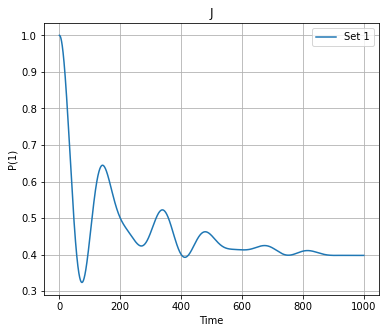

In [154]:
plt.figure(figsize=(6, 5))
plt.plot(time, np.real(data1), label='Set 1') 

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('P(1)')
plt.title('J')
plt.legend()

# Show the plot
plt.grid(True)  
plt.show()

In [73]:
def multM(xc):
    xnew=xc.copy()
    xnew[0] = np.dot(elev, xc[0]) + np.dot(Phi1, xc[1]) + np.dot(Phi2, xc[2])
    xnew[1] = np.dot(elev - gamma * id4, xc[1]) + np.dot(Phi2, xc[5]) + np.dot(Phi1, xc[3]) + np.dot(Theta1, xc[0])
    xnew[2] = np.dot(elev - gamma * id4, xc[2]) + np.dot(Phi1, xc[5]) + np.dot(Phi2, xc[4]) + np.dot(Theta2, xc[0])
    xnew[3] = np.dot(elev, xc[3])
    xnew[4] = np.dot(elev, xc[4])
    xnew[5] = np.dot(elev, xc[5])
    
    return xnew;

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 1.0)

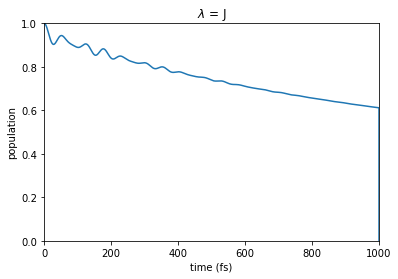

In [74]:
for i in range(LT - 2):  # Changed LT - 2 to LT - 1
    # do step of evolution of HEOM
    rhotd = rhot.copy()

    # RUNGE KUTTE 4TH ORDER METHOD
    k1 = dt * multM(rhotd)
    k2 = dt * multM(rhotd + k1 / 2)
    k3 = dt * multM(rhotd + k2 / 2)
    k4 = dt * multM(rhotd + k3)

    rhot += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    # Plotting the first site
    rhoevol[i + 1, :-1] = rhot[0, :]

plt.plot(rhoevol[:, 4], rhoevol[:, 0])
plt.xlabel('time (fs)')
plt.ylabel('population')
plt.title( "$\lambda$ = J")
plt.xlim(0, 1000)
plt.ylim(0,1)

#end = time.time()
